In [1]:
import numpy as np 
import os
import pandas as pd 
import time
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
low_memory=False 
df1=pd.read_csv("./drive/MyDrive/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("./drive/MyDrive/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("./drive/MyDrive/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("./drive/MyDrive/cicids2017/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("./drive/MyDrive/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("./drive/MyDrive/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("./drive/MyDrive/cicids2017/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("./drive/MyDrive/cicids2017/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

In [4]:
nRowsRead = None 
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8
df.shape

(2830743, 79)

In [5]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
df[' Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [7]:
#converting text labels to 0 and 1
df[' Label'] = [1.0 if x == "DDoS" else 0.0 for x in df[' Label']]

In [8]:
df[' Label'].value_counts()

0.0    2702716
1.0     128027
Name:  Label, dtype: int64

In [9]:
df.duplicated().sum()

309076

In [10]:
#remove duplicate rows while keeping only the first occurrence of each unique row
df =  df.drop_duplicates(keep="first")

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum().sort_values(ascending = False)

Flow Bytes/s                    352
 Destination Port                 0
 Bwd Avg Bytes/Bulk               0
 Fwd Avg Packets/Bulk             0
Fwd Avg Bytes/Bulk                0
 Fwd Header Length.1              0
 Avg Bwd Segment Size             0
 Avg Fwd Segment Size             0
 Average Packet Size              0
 Down/Up Ratio                    0
 ECE Flag Count                   0
 CWE Flag Count                   0
 URG Flag Count                   0
 ACK Flag Count                   0
 PSH Flag Count                   0
 RST Flag Count                   0
 SYN Flag Count                   0
FIN Flag Count                    0
 Packet Length Variance           0
 Fwd Avg Bulk Rate                0
 Bwd Avg Packets/Bulk             0
 Packet Length Mean               0
Active Mean                       0
 Idle Min                         0
 Idle Max                         0
 Idle Std                         0
Idle Mean                         0
 Active Min                 

In [13]:
df.isnull().sum().sort_values(ascending = False)

Flow Bytes/s                    352
 Destination Port                 0
 Bwd Avg Bytes/Bulk               0
 Fwd Avg Packets/Bulk             0
Fwd Avg Bytes/Bulk                0
 Fwd Header Length.1              0
 Avg Bwd Segment Size             0
 Avg Fwd Segment Size             0
 Average Packet Size              0
 Down/Up Ratio                    0
 ECE Flag Count                   0
 CWE Flag Count                   0
 URG Flag Count                   0
 ACK Flag Count                   0
 PSH Flag Count                   0
 RST Flag Count                   0
 SYN Flag Count                   0
FIN Flag Count                    0
 Packet Length Variance           0
 Fwd Avg Bulk Rate                0
 Bwd Avg Packets/Bulk             0
 Packet Length Mean               0
Active Mean                       0
 Idle Min                         0
 Idle Max                         0
 Idle Std                         0
Idle Mean                         0
 Active Min                 

In [14]:
df=df.groupby(' Label').filter(lambda x:len(x)>10000)
df[' Label'].value_counts()

0.0    2393651
1.0     128016
Name:  Label, dtype: int64

In [15]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0.0
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0.0
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0.0
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0.0
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0.0


In [16]:
# identify the data types of columns in a DataFrame, 
# separate them into integer and floating-point categories, 
# and then convert their data types to more memory-efficient representations 
# (32-bit integers and 32-bit floating-point numbers) 
# in order to optimize memory usage during machine learning data processing
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")

In [17]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# df.reset_index(drop=True,inplace=True)

<ipython-input-17-ecdbaf5cef6e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


In [19]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
              colname = corr_matrix.columns[i]                  
              col_corr.add(colname)
    return col_corr

In [20]:
corr_features = correlation(df, 0.75)
corr_features 

{' Active Max',
 ' Active Min',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Avg Fwd Segment Size',
 ' Bwd IAT Max',
 ' Bwd IAT Mean',
 ' Bwd IAT Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Flow IAT Max',
 ' Fwd Header Length.1',
 ' Fwd IAT Max',
 ' Fwd IAT Mean',
 ' Fwd IAT Min',
 ' Fwd IAT Std',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 ' Idle Max',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' SYN Flag Count',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 ' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 'Bwd IAT Total',
 'Fwd IAT Total',
 'Fwd Packets/s',
 'Idle Mean',
 'Subflow Fwd Packets'}

In [21]:
# identify highly correlated features in a dataset. 
# Correlated features can potentially cause multicollinearity issues 
# in machine learning models or introduce redundant information. 
# By using this function, one can identify and remove or handle correlated features appropriately
# helping to improve the performance and interpretability of the resulting machine learning models.

df.drop(corr_features,axis=1,inplace=True)

In [22]:
df.shape

(2520104, 40)

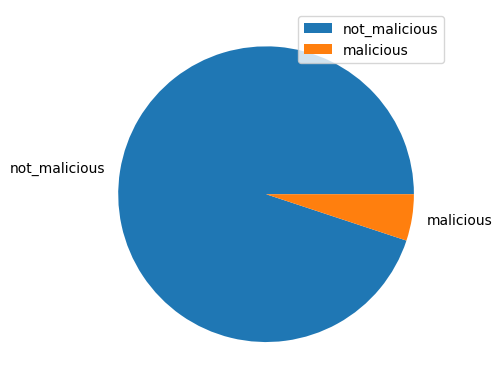

In [23]:
#using matplotlib to plot the label column for pie chart

labels = ["not_malicious","malicious"]


size = [dict(df[' Label'].value_counts())[0],dict(df[' Label'].value_counts())[1]]
plt.pie(size,labels = labels)

plt.legend(["not_malicious", "malicious"])
plt.show()

In [24]:
x = df.drop([' Label'],axis=1)
y = df[' Label']

In [25]:
x.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Min,Bwd IAT Std,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Bwd Packets/s,Min Packet Length,FIN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Idle Std
0,54865,3,2,12,6,6,0,0,4.000000e+06,666666.687500,3.0,0.0,3,0.0,0,0,0,0,40,0,0.000000,6,0,0,0,1,0,0,0,0,0,0,0,0,33,-1,0.0,0.0,0.0
1,55054,109,1,6,6,6,6,6,1.100917e+05,18348.623047,109.0,0.0,109,0.0,0,0,0,0,20,20,9174.311523,6,0,0,0,1,1,1,0,0,0,0,0,0,29,256,0.0,0.0,0.0
2,55055,52,1,6,6,6,6,6,2.307692e+05,38461.539062,52.0,0.0,52,0.0,0,0,0,0,20,20,19230.769531,6,0,0,0,1,1,1,0,0,0,0,0,0,29,256,0.0,0.0,0.0
3,46236,34,1,6,6,6,6,6,3.529412e+05,58823.531250,34.0,0.0,34,0.0,0,0,0,0,20,20,29411.765625,6,0,0,0,1,1,1,0,0,0,0,0,0,31,329,0.0,0.0,0.0
4,54863,3,2,12,6,6,0,0,4.000000e+06,666666.687500,3.0,0.0,3,0.0,0,0,0,0,40,0,0.000000,6,0,0,0,1,0,0,0,0,0,0,0,0,32,-1,0.0,0.0,0.0


In [26]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name:  Label, dtype: float64

In [27]:
rus = RandomUnderSampler(random_state=0)
rus.fit(x, y)
Xn, yn = rus.fit_resample(x, y)

In [28]:
Xn.head()
Xn.shape

(256028, 39)

In [29]:
cols = list(Xn.columns)
for col in cols:
    Xn[col] = stats.zscore(Xn[col])

In [30]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(Xn,yn,test_size=0.30,random_state=0)

In [31]:
print(np.any(np.isnan(X_train)))
print(np.all(np.isfinite(X_train)))

True
False


In [32]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with 'mean' strategy to replace NaN values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to X_train and transform X_train and X_test with it
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Apply StandardScaler to X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression

#creating a logisticregression object
start_time = time.perf_counter()
LR = LogisticRegression(max_iter=1000)

#train the model using the training the data
LR.fit(X_train,Y_train)
end_time = time.perf_counter()

#predict the classes of test data
y_pred = LR.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

# compute F1 score
f1 = f1_score(Y_test, y_pred)
print('F1 score:', f1)

# compute precision
precision = precision_score(Y_test, y_pred)
print('Precision:', precision)

# compute recall
recall = recall_score(Y_test, y_pred)
print('Recall:', recall)

# compute classification report
report = classification_report(Y_test, y_pred)
print('Classification report:\n', report)

# compute confusion matrix
confusion = confusion_matrix(Y_test, y_pred)
print('Confusion matrix:\n', confusion)
print("accuracy achieved using logistic regression:",accuracy*100)

# Calculate the computation time
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.9886081058209324
F1 score: 0.9887252438568684
Precision: 0.9786246301397816
Recall: 0.9990365336041455
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     38406
         1.0       0.98      1.00      0.99     38403

    accuracy                           0.99     76809
   macro avg       0.99      0.99      0.99     76809
weighted avg       0.99      0.99      0.99     76809

Confusion matrix:
 [[37568   838]
 [   37 38366]]
accuracy achieved using logistic regression: 98.86081058209324
Computation time: 7.0077528760000405 seconds


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

start_time = time.perf_counter()
#now initializing KNN
KNN = KNeighborsClassifier(n_neighbors = 5)

#train the KNN model
KNN.fit(X_train,Y_train)
end_time = time.perf_counter()

#test the KNN model
y_pred = KNN.predict(X_test)


# calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

# compute F1 score
f1 = f1_score(Y_test, y_pred)
print('F1 score:', f1)

# compute precision
precision = precision_score(Y_test, y_pred)
print('Precision:', precision)

# compute recall
recall = recall_score(Y_test, y_pred)
print('Recall:', recall)

# compute classification report
report = classification_report(Y_test, y_pred)
print('Classification report:\n', report)

# compute confusion matrix
confusion = confusion_matrix(Y_test, y_pred)
print('Confusion matrix:\n', confusion)

# Calculate the computation time
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.9994011118488719
F1 score: 0.9994011352392855
Precision: 0.9993230753208884
Recall: 0.9994792073535922
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38406
         1.0       1.00      1.00      1.00     38403

    accuracy                           1.00     76809
   macro avg       1.00      1.00      1.00     76809
weighted avg       1.00      1.00      1.00     76809

Confusion matrix:
 [[38380    26]
 [   20 38383]]
Computation time: 0.03921837799998684 seconds


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

start_time = time.perf_counter()
dt = DecisionTreeClassifier(random_state=42)

# train the model using the training data
dt.fit(X_train, Y_train)
end_time = time.perf_counter()

# predict the classes of test data
y_pred = dt.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

# compute F1 score
f1 = f1_score(Y_test, y_pred)
print('F1 score:', f1)

# compute precision
precision = precision_score(Y_test, y_pred)
print('Precision:', precision)

# compute recall
recall = recall_score(Y_test, y_pred)
print('Recall:', recall)

# compute classification report
report = classification_report(Y_test, y_pred)
print('Classification report:\n', report)

# compute confusion matrix
confusion = confusion_matrix(Y_test, y_pred)
print('Confusion matrix:\n', confusion)

# Calculate the computation time
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.9997916910778685
F1 score: 0.9997916775167961
Precision: 0.9998177130803886
Recall: 0.9997656433091164
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38406
         1.0       1.00      1.00      1.00     38403

    accuracy                           1.00     76809
   macro avg       1.00      1.00      1.00     76809
weighted avg       1.00      1.00      1.00     76809

Confusion matrix:
 [[38399     7]
 [    9 38394]]
Computation time: 1.1798518269999931 seconds


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


start_time = time.perf_counter()
rf = RandomForestClassifier(random_state=42)

# train the model using the training data
rf.fit(X_train, Y_train)
end_time = time.perf_counter()

# predict the classes of test data
y_pred = rf.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

# compute F1 score
f1 = f1_score(Y_test, y_pred)
print('F1 score:', f1)

# compute precision
precision = precision_score(Y_test, y_pred)
print('Precision:', precision)

# compute recall
recall = recall_score(Y_test, y_pred)
print('Recall:', recall)

# compute classification report
report = classification_report(Y_test, y_pred)
print('Classification report:\n', report)

# compute confusion matrix
confusion = confusion_matrix(Y_test, y_pred)
print('Confusion matrix:\n', confusion)

# Calculate the computation time
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.999882826231301
F1 score: 0.9998828109741011
Precision: 0.9999739556203772
Recall: 0.9997916829414368
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38406
         1.0       1.00      1.00      1.00     38403

    accuracy                           1.00     76809
   macro avg       1.00      1.00      1.00     76809
weighted avg       1.00      1.00      1.00     76809

Confusion matrix:
 [[38405     1]
 [    8 38395]]
Computation time: 23.28018522299999 seconds


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.perf_counter()
# create a Gradient Boosting Classifier object
gb = GradientBoostingClassifier(random_state=42)

# train the model using the training data
gb.fit(X_train, Y_train)
end_time = time.perf_counter()

# predict the classes of test data
y_pred = gb.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

# compute F1 score
f1 = f1_score(Y_test, y_pred)
print('F1 score:', f1)

# compute precision
precision = precision_score(Y_test, y_pred)
print('Precision:', precision)

# compute recall
recall = recall_score(Y_test, y_pred)
print('Recall:', recall)

# compute classification report
report = classification_report(Y_test, y_pred)
print('Classification report:\n', report)

# compute confusion matrix
confusion = confusion_matrix(Y_test, y_pred)
print('Confusion matrix:\n', confusion)

# Calculate the computation time
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.9997526331549689
F1 score: 0.9997526009453248
Precision: 0.9998437337222628
Recall: 0.999661484779835
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38406
         1.0       1.00      1.00      1.00     38403

    accuracy                           1.00     76809
   macro avg       1.00      1.00      1.00     76809
weighted avg       1.00      1.00      1.00     76809

Confusion matrix:
 [[38400     6]
 [   13 38390]]
Computation time: 72.56894319499997 seconds


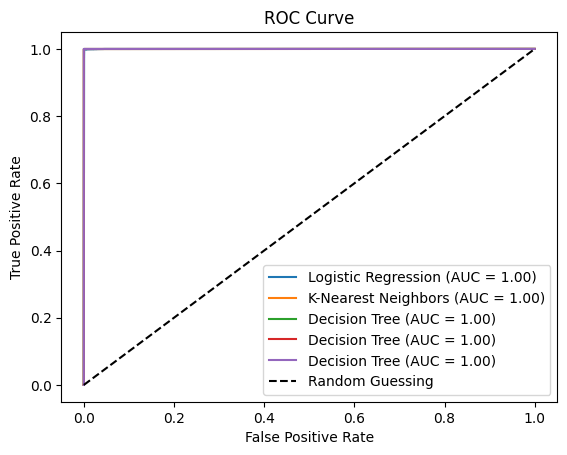

In [38]:
# Plot the AUC curve
lr_prob = LR.predict_proba(X_test)[:, 1]
knn_prob = KNN.predict_proba(X_test)[:, 1]
dt_prob = dt.predict_proba(X_test)[:, 1]
gb_prob = gb.predict_proba(X_test)[:, 1]
rf_prob = rf.predict_proba(X_test)[:, 1]

lr_fpr, lr_tpr, thresholds0 = roc_curve(Y_test, lr_prob)
knn_fpr, knn_tpr, thresholds1 = roc_curve(Y_test, knn_prob)
dt_fpr, dt_tpr, thresholds2 = roc_curve(Y_test, dt_prob)
gb_fpr, gb_tpr, thresholds3 = roc_curve(Y_test, gb_prob)
rf_fpr, rf_tpr, thresholds4 = roc_curve(Y_test, rf_prob)

# calculate ROC AUC score
lr_auc = roc_auc_score(Y_test, lr_prob)
knn_auc = roc_auc_score(Y_test, knn_prob)
dt_auc = roc_auc_score(Y_test, gb_prob)
gb_auc = roc_auc_score(Y_test, rf_prob)
rf_auc = roc_auc_score(Y_test, dt_prob)


# plot ROC curves
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})")
plt.plot(knn_fpr, knn_tpr, label=f"K-Nearest Neighbors (AUC = {knn_auc:.2f})")
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})")
plt.plot(gb_fpr, gb_tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})")
plt.plot(rf_fpr, rf_tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [49]:
def plot_confusion_matrix(cm,title,cmap=None,target=None,normalize=False):

    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('viridis')
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target is not None:
        ticks = np.arange(len(target))
        plt.xticks(ticks, target, rotation=45)
        plt.yticks(ticks, target)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
    plt.grid(False)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    plt.savefig(title, bbox_inches='tight', dpi=300)

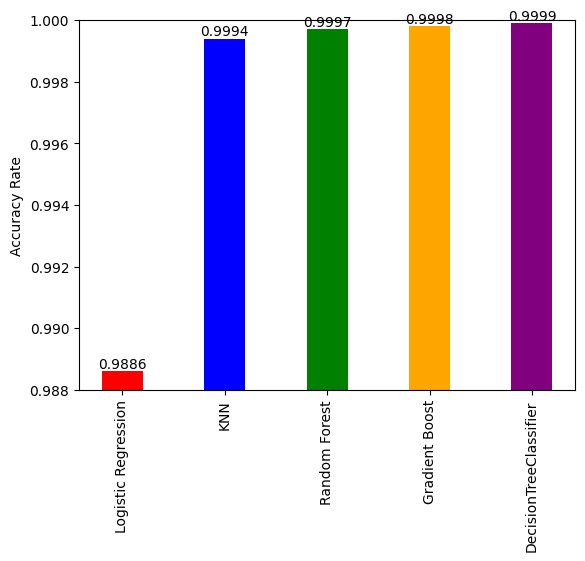

In [46]:
import matplotlib.pyplot as plt


# Define a list of  Accuracy rate for each algorithm
Accuracy = [0.9886,0.9994, 0.9997,0.9998,0.9999]
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Define a list of machine learning algorithm names
algorithm_names = ['Logistic Regression','KNN', 'Random Forest', 'Gradient Boost', 'DecisionTreeClassifier']

fig, ax = plt.subplots()
x_pos = range(len(algorithm_names))
ax.bar(x_pos,Accuracy, align='center', width= 0.4,color = colors)
ax.set_xticks(x_pos)
ax.set_xticklabels(algorithm_names, rotation=90)
ax.set_ylabel('Accuracy Rate')
#ax.set_title('Accuracy Rate Comparison for Different ML Algorithms')

ax.set_ylim([0.988, 1])

for i, v in enumerate(Accuracy):
    ax.text(i, v, f"{v:.4f}", color='black', ha='center', va='bottom')

# Display the plot
plt.show()

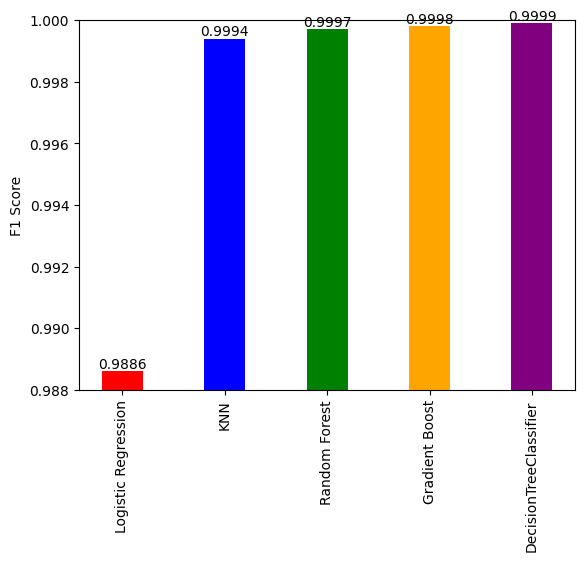

In [47]:
import matplotlib.pyplot as plt


# Define a list of F1 scores for each algorithm
f1_scores =  [0.9886,0.9994, 0.9997,0.9998,0.9999]
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Define a list of machine learning algorithm names
algorithm_names = ['Logistic Regression','KNN', 'Random Forest', 'Gradient Boost', 'DecisionTreeClassifier']

fig, ax = plt.subplots()
x_pos = range(len(algorithm_names))
ax.bar(x_pos, f1_scores, align='center' , width = 0.4,color = colors)
ax.set_xticks(x_pos)
ax.set_xticklabels(algorithm_names, rotation=90)
ax.set_ylabel('F1 Score')
#ax.set_title('F1 Score Comparison for Different ML Algorithms')

ax.set_ylim([0.988, 1])

for i, v in enumerate(f1_scores):
    ax.text(i, v, f"{v:.4f}", color='black', ha='center', va='bottom')

# Display the plot
plt.show()


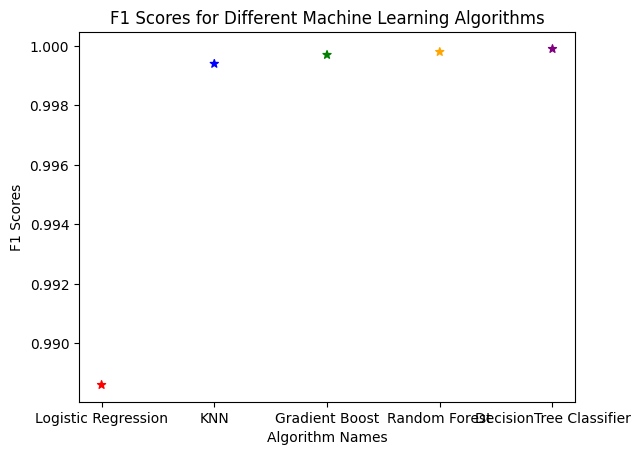

In [48]:
import matplotlib.pyplot as plt

# Define the F1 scores and algorithm names

algorithm_names = ['Logistic Regression', 'KNN', 'Gradient Boost', 'Random Forest', 'DecisionTree Classifier']
f1_scores =  [0.9886,0.9994, 0.9997,0.9998,0.9999]
# Define a list of colors for each algorithm
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Create a scatter plot
plt.scatter(algorithm_names, f1_scores, c=colors , marker = "*")

# Set the title and labels
plt.title('F1 Scores for Different Machine Learning Algorithms')
plt.xlabel('Algorithm Names')
plt.ylabel('F1 Scores')


ax.set_ylim([0.988, 1])

# Show the graph
plt.show()



